In [2]:
using LinearAlgebra, Plots

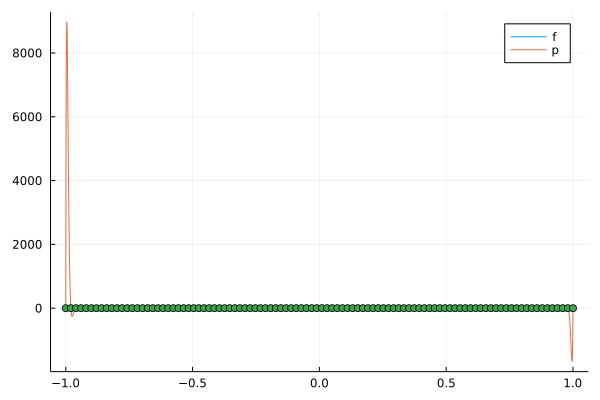

In [72]:
# Evenly spaced points
# Monomial basis
# Conclusion: it may diverge (and its unstable)


f = x -> 1/(25x^2 + 1) # Runge's function

n = 100
ùê± = range(-1,1; length=n)

V = ùê± .^ (0:n-1)' # Vandermonde matrix
ùêü = f.(ùê±) # sample of a function

c = V \ ùêü # coefficients
p = x -> dot(c, x .^ (0:n-1)) # polynomial

g = range(-1,1; length=10_000)
plot(g, f.(g); label="f")
plot!(g, p.(g); label="p")
scatter!(ùê±, ùêü; label=nothing)

In [73]:
function lagrangebasis(ùê±, k, x)
    n = length(ùê±)
    ret = 1.0
    for j = 1:n
        if j ‚â† k
            ret *= (x-ùê±[j])/(ùê±[k]-ùê±[j])
        end
    end
    ret
end
    
function lagrangeinterpolation(ùê±, ùêü, x)
    n = length(ùê±)
    ret = 0.0
    for k = 1:n
        ret += ùêü[k]*lagrangebasis(ùê±, k, x)
    end
    ret
end

lagrangeinterpolation (generic function with 1 method)

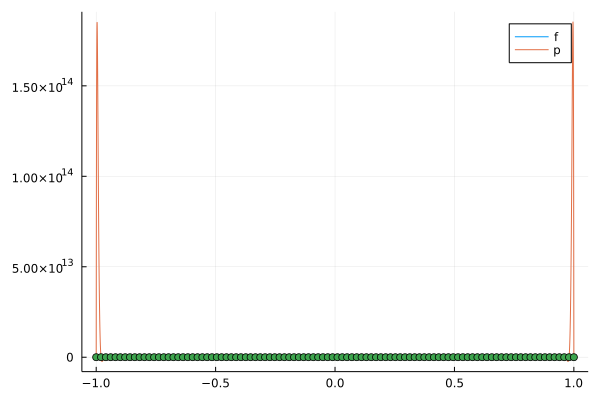

In [76]:
# Evenly spaced points
# Lagrange basis
# Conclusion: it may diverge (and its unstable)



f = x -> 1/(25x^2+1)

n = 100
ùê± = range(-1,1; length=n)
ùêü = f.(ùê±)
p = x -> lagrangeinterpolation(ùê±, ùêü, x)
    
g = range(-1,1; length=10_000)
plot(g, f.(g); label="f")
plot!(g, p.(g); label="p")
scatter!(ùê±, ùêü; label=nothing)

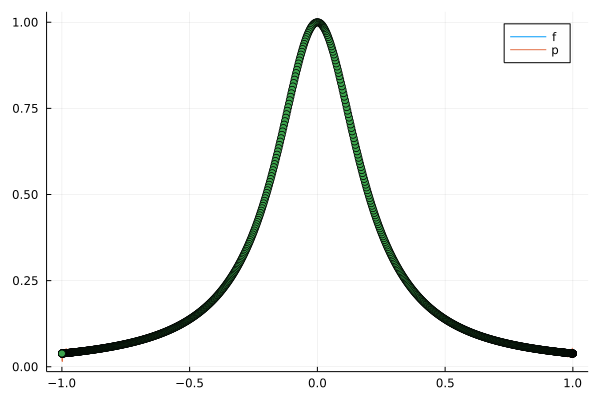

In [87]:
# Roots of T_n(x)
# Monomial basis
# Converges! (but some instable)

f = x -> 1/(25x^2+1) # Runge's function

n = 1000

T(k,x) = cos(k*acos(x))
# roots of T(n,x) = cos(n*acos(x))
ùê± = cos.(œÄ/n*[j-1/2 for j=1:n])

V = ùê± .^ (0:n-1)' # Vandermonde
ùêü = f.(ùê±)

c = V \ ùêü
p = x -> dot(c, x .^ (0:n-1))

g = range(-1,1; length=10_000)
plot(g, f.(g); label="f")
plot!(g, p.(g); label="p")
scatter!(ùê±, ùêü; label=nothing)

In [83]:
norm(T.(n,ùê±))

1.530709406528767e-11

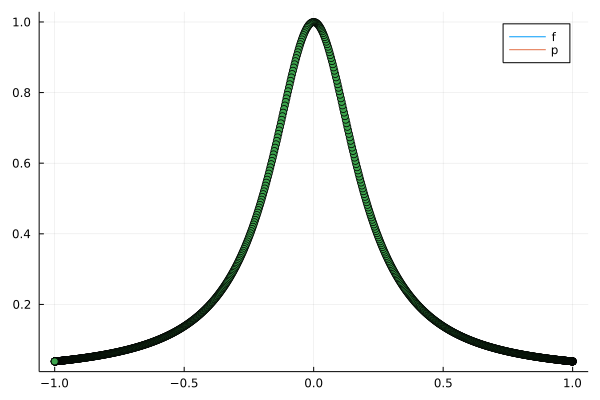

In [88]:
# Roots of orthogonal polynomials T_n(x)
# Basis of OPs [T_0(x),‚Ä¶,T_{n-1}(x)]
# Converges! And it is stable!
# OPs WIN!!



f = x -> 1/(25x^2+1)

n = 1000
ùê± = cos.(œÄ/n*[j-1/2 for j=1:n])

T(k,x) = cos(k*acos(x))

V = T.((0:n-1)', ùê±)
ùêü = f.(ùê±)

c = V \ ùêü
p = x -> dot(c, cos.((0:n-1) * acos(x)))

g = range(-1,1; length=10_000)
plot(g, f.(g); label="f")
plot!(g, p.(g); label="p")
scatter!(ùê±, ùêü; label=nothing)

In [91]:
norm(abs.(f.(g) - p.(g))) # polynomial matches f to roughly machine precision

4.4601288499505244e-14

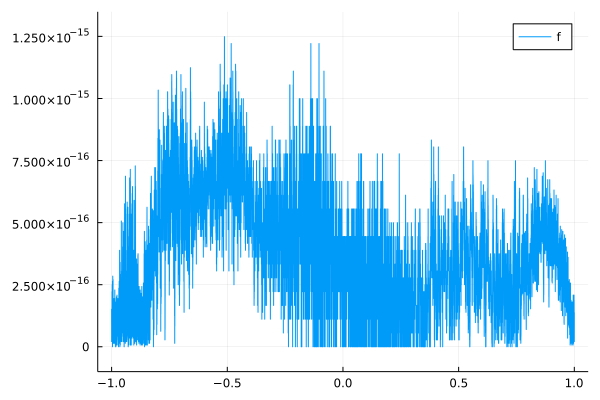

In [90]:
plot(g, abs.(f.(g) - p.(g)); label="f")